In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def science_plot(fontsize = 9):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()

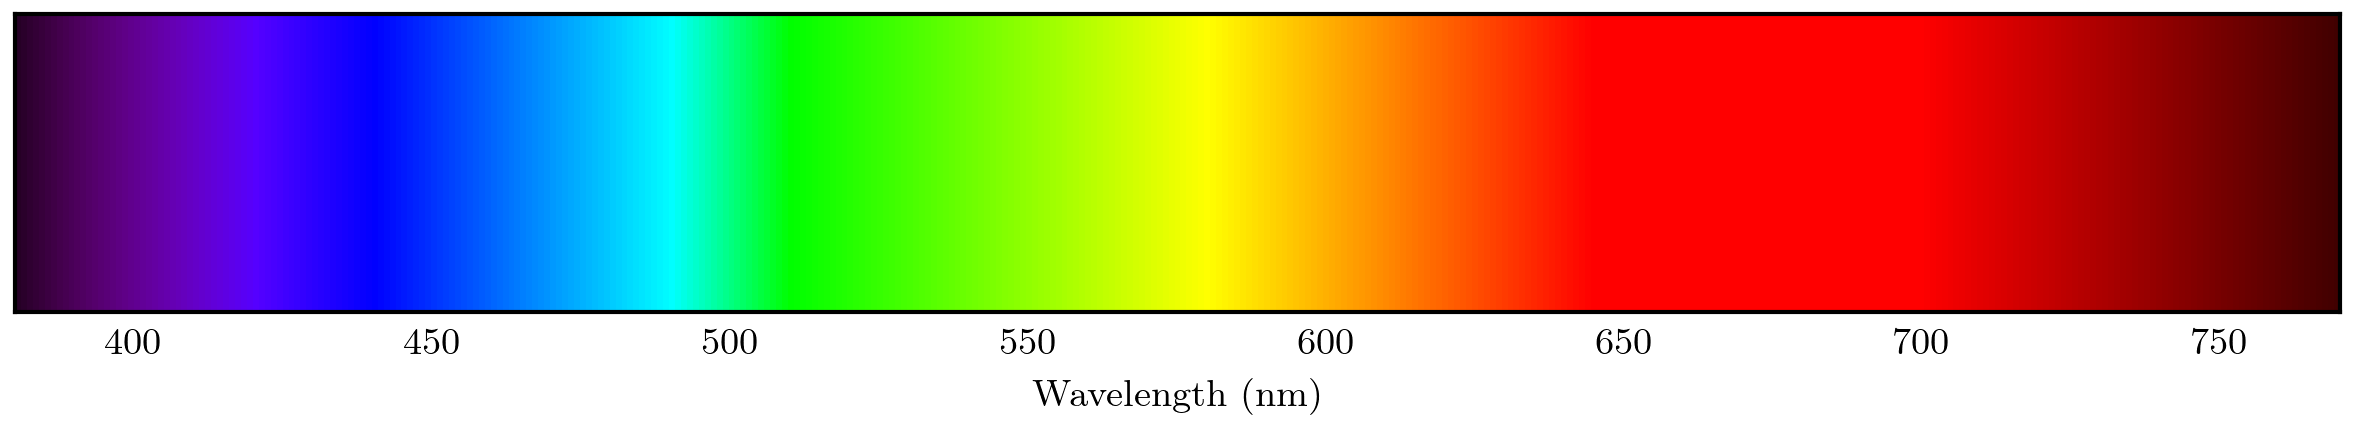

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def wavelength_to_rgb(wavelength, intensity=1):
    """
    Convert a wavelength (or array of wavelengths) in nanometers to RGB colors with intensity scaling.

    Parameters:
    - wavelength (float or ndarray): Wavelength(s) in nanometers (380 nm to 780 nm).
    - intensity (float or ndarray): Intensity values (0 to 1) applied to brightness.

    Returns:
    - ndarray: Array of shape (..., 3) with RGB values scaled between 0 and 1.
    """
    wavelength = np.asarray(wavelength)  # Convert to NumPy array if not already
    intensity = np.asarray(intensity)  # Convert intensity to NumPy array if needed
    intensity = np.clip(intensity, 0, 1)  # Ensure intensity stays within valid range

    # Initialize RGB arrays
    R = np.zeros_like(wavelength, dtype=float)
    G = np.zeros_like(wavelength, dtype=float)
    B = np.zeros_like(wavelength, dtype=float)

    # Define color mapping
    mask1 = (380 <= wavelength) & (wavelength < 440)
    R[mask1] = -(wavelength[mask1] - 440) / (440 - 380)
    B[mask1] = 1.0

    mask2 = (440 <= wavelength) & (wavelength < 490)
    G[mask2] = (wavelength[mask2] - 440) / (490 - 440)
    B[mask2] = 1.0

    mask3 = (490 <= wavelength) & (wavelength < 510)
    G[mask3] = 1.0
    B[mask3] = -(wavelength[mask3] - 510) / (510 - 490)

    mask4 = (510 <= wavelength) & (wavelength < 580)
    R[mask4] = (wavelength[mask4] - 510) / (580 - 510)
    G[mask4] = 1.0

    mask5 = (580 <= wavelength) & (wavelength < 645)
    R[mask5] = 1.0
    G[mask5] = -(wavelength[mask5] - 645) / (645 - 580)

    mask6 = (645 <= wavelength) & (wavelength <= 780)
    R[mask6] = 1.0

    # Apply intensity correction with stronger dimming at edges
    factor = np.ones_like(wavelength, dtype=float)
    mask_dim1 = (wavelength < 420)
    factor[mask_dim1] = 0.15 + 0.85 * (wavelength[mask_dim1] - 380) / (420 - 380)  # Stronger fade-in
    
    mask_dim2 = (wavelength > 700)
    factor[mask_dim2] = 0.15 + 0.85 * (780 - wavelength[mask_dim2]) / (780 - 700)  # Stronger fade-out

    # Apply dimming and intensity
    R = np.clip(R * factor * intensity, 0, 1)
    G = np.clip(G * factor * intensity, 0, 1)
    B = np.clip(B * factor * intensity, 0, 1)

    return np.stack([R, G, B], axis=-1)


# Generate spectrum
l = np.arange(380, 771)  # Wavelengths from 380 to 770 nm
spec = wavelength_to_rgb(l)  # Get RGB values

# Create an image (height 100, width len(l), depth 3 for RGB)
spectrum_img = np.tile(spec, (50, 1, 1))

# Display the spectrum
plt.figure(figsize=(10, 2), dpi = 300)
plt.imshow(spectrum_img, extent = [380,770,0,50])
plt.yticks([])
plt.grid()
plt.tick_params(axis="x", which = 'both', length=0)
plt.xlabel('Wavelength (nm)')
plt.show()


In [35]:
physical_data = pd.read_csv('Actual data/Wavelengths.csv')
print(physical_data)

           Element  Grating/mm  0Degree  0minute  Degree  Minute
0         Hydrogen         100       -1       -5       4      49
1         Hydrogen         100       -1       -5       3      50
2         Hydrogen         100       -1       -5       3      23
3            Argon         100       -1       -5       4      30
4            Argon         100       -1       -5       4      14
5            Argon         100       -1       -5       3      59
6            Argon         100       -1       -5       3      35
7            Argon         100       -1       -5       3      28
8   Carbon Dioxide         100       -1       -5       4      41
9   Carbon Dioxide         100       -1       -5       4      32
10  Carbon Dioxide         100       -1       -5       4      11
11  Carbon Dioxide         100       -1       -5       3      50
12  Carbon Dioxide         100       -1       -5       3      31
13            Neon         100       -1       -5       4      45
14            Neon       

In [36]:
# Compute true_angle
physical_data["true_angle"] = (physical_data["Degree"] + physical_data["Minute"] / 60) + (physical_data["0Degree"] + physical_data["0minute"] / 60)

# Compute angle in decimal degrees (same as true_angle)
physical_data["angle_dec"] = physical_data["true_angle"]

# Convert angle to radians for wavelength calculation
physical_data["theta_rad"] = np.radians(physical_data["angle_dec"])

# Compute wavelength using n = Grating/mm converted to meters (1000 lines/mm → 1e3 lines/m)
physical_data["wavelength"] = np.sin(physical_data["theta_rad"])/(physical_data["Grating/mm"])*10e5

physical_data["wavelength rnd"] = np.round(physical_data["wavelength"])
# Display result
print(physical_data)

           Element  Grating/mm  0Degree  0minute  Degree  Minute  true_angle  \
0         Hydrogen         100       -1       -5       4      49        3.73   
1         Hydrogen         100       -1       -5       3      50        2.75   
2         Hydrogen         100       -1       -5       3      23        2.30   
3            Argon         100       -1       -5       4      30        3.42   
4            Argon         100       -1       -5       4      14        3.15   
5            Argon         100       -1       -5       3      59        2.90   
6            Argon         100       -1       -5       3      35        2.50   
7            Argon         100       -1       -5       3      28        2.38   
8   Carbon Dioxide         100       -1       -5       4      41        3.60   
9   Carbon Dioxide         100       -1       -5       4      32        3.45   
10  Carbon Dioxide         100       -1       -5       4      11        3.10   
11  Carbon Dioxide         100       -1 

In [37]:
h_spectra = np.array([656, 486, 434, 410])
h_spectra_ang = np.rad2deg(np.arcsin(100*h_spectra/ (10e5)))
def dec2dms(deg):
    """
    Convert decimal degrees to degrees, minutes, and seconds (DMS).
    Handles both single inputs and arrays.

    Parameters:
        deg (float or np.ndarray): Input in decimal degrees.

    Returns:
        str or list: DMS formatted string(s).
    """
    # Ensure input is a NumPy array for vectorized operations
    deg = np.asarray(deg)

    # Calculate degrees, minutes, and seconds
    degrees = np.floor(np.abs(deg)).astype(int) * np.sign(deg)  # Handle negative values
    fractional_degrees = np.abs(deg) - np.abs(degrees)
    minutes = np.floor(fractional_degrees * 60).astype(int)
    seconds = (fractional_degrees * 3600) % 60

    # Format the output
    def format_dms(d, m, s):
        return f"{int(d)}d{int(m):02d}m{s:05.2f}s\""

    # Apply formatting to all elements if input is an array
    if deg.ndim == 0:  # Single value
        return format_dms(degrees, minutes, seconds)
    else:  # Array
        return [format_dms(d, m, s) for d, m, s in zip(degrees, minutes, seconds)]
h_spectra_ang_dms = dec2dms(h_spectra_ang)
print(h_spectra_ang_dms)

['3d45m40.69s"', '2d47m08.42s"', '2d29m14.71s"', '2d20m59.23s"']


In [38]:
# Filter the DataFrame for Hydrogen and grating 100
def element_spectra(element, grating):
    df = physical_data[(physical_data['Element'] == element) & (physical_data['Grating/mm'] == grating)]
    # Extract the rounded wavelength column
    rounded_wavelengths=df['wavelength rnd'].values
    print(rounded_wavelengths)
    return rounded_wavelengths

[651. 480. 401.]
[657. 474. 399.]
[624. 448. 402.]


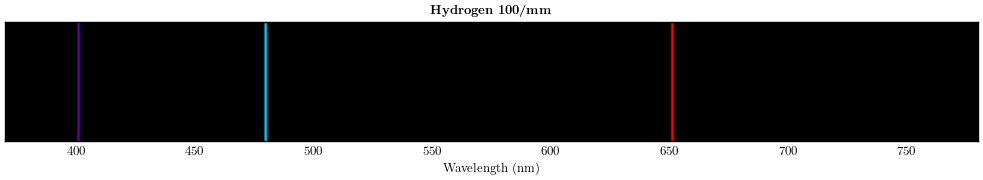

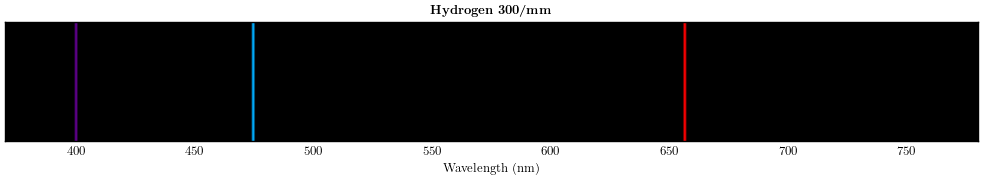

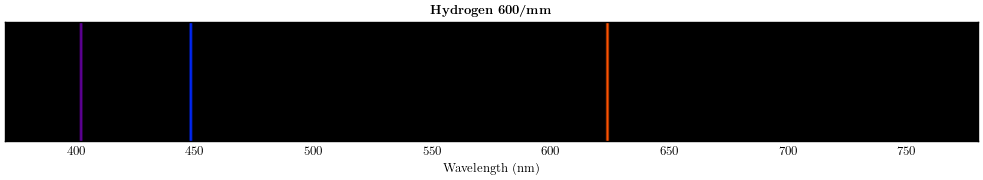

In [39]:
def make_spectrum(title, wavelengths, height = 100, set_title = True):
    width = 390
    # Normalize wavelength range to fit within the 390-pixel width
    min_wl, max_wl = 370, 780
    positions = np.round((wavelengths - min_wl) / (max_wl - min_wl) * (width - 1)).astype(int)

    # Create a 100x390x3 RGB image initialized to black
    spectrum_img = np.zeros((height, width, 3))

    # Apply colors at the spectral line positions
    for pos, wl in zip(positions, wavelengths):
        color = wavelength_to_rgb(wl)
        spectrum_img[:, pos, :] = color  # Fill the column with the corresponding color

    # Display the spectrum
    plt.figure(figsize=(10, 2))
    plt.imshow(spectrum_img, extent=[min_wl, max_wl, 0, height])
    plt.xlabel("Wavelength (nm)")
    plt.yticks([])
    if set_title:
        plt.title(rf"\textbf{{{title}}}")
    plt.tick_params(axis="x", which = 'both', length=0)
    plt.grid()
    plt.tight_layout()
    
    
make_spectrum("Hydrogen 100/mm", element_spectra('Hydrogen', 100), height = 50)

make_spectrum("Hydrogen 300/mm", element_spectra('Hydrogen', 300), height = 50)

make_spectrum("Hydrogen 600/mm", element_spectra('Hydrogen', 600), height = 50)

In [40]:
import pandas as pd

def process_nist_data(file_name):
    # Read the CSV file
    df = pd.read_csv(file_name)

    # Clean wavelength and intensity columns (remove extra characters and convert to float)
    df["obs_wl_air(nm)"] = df["obs_wl_air(nm)"].str.extract(r'([\d.]+)').astype(float)
    df["intens"] = df["intens"].str.extract(r'([\d.]+)').astype(float)

    # Drop rows with missing values
    df = df.dropna(subset=["obs_wl_air(nm)", "intens"])

    # Normalize intensity so the maximum is 1.0
    df["intens"] /= df["intens"].max()

    # Rename columns
    df = df.rename(columns={"obs_wl_air(nm)": "Wavelength", "intens": "Intensity"})

    # Select only the needed columns
    df_new = df[["Wavelength", "Intensity"]]

    return df_new

# Example usage:
nist_df = process_nist_data(r'True data\N.csv')
print(nist_df)


     Wavelength  Intensity
0        383.84       0.28
1        391.90       0.36
2        393.85       0.09
3        395.58       0.45
4        399.50       1.00
5        399.86       0.15
6        400.36       0.20
7        403.51       0.36
8        404.13       0.55
9        404.35       0.36
10       405.78       0.15
11       409.73       0.25
12       409.99       0.14
13       410.34       0.20
14       411.00       0.18
15       417.62       0.28
16       419.58       0.12
17       420.01       0.15
18       422.77       0.28
19       423.69       0.28
20       423.70       0.22
21       424.18       0.45
22       433.29       0.09
23       434.57       0.12
24       437.91       0.30
25       443.27       0.28
26       444.70       0.65
27       451.09       0.09
28       451.49       0.12
29       453.04       0.36
30       460.15       0.55
31       460.37       0.35
32       460.63       0.09
33       460.72       0.45
34       461.39       0.36
35       462.00       0.25
3

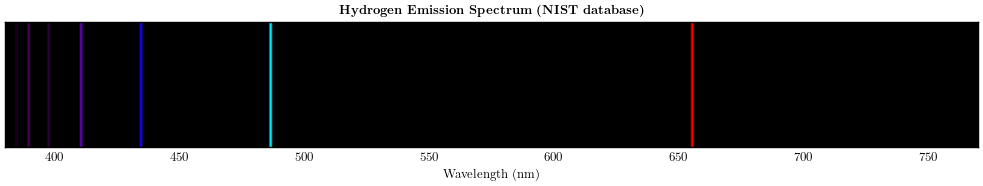

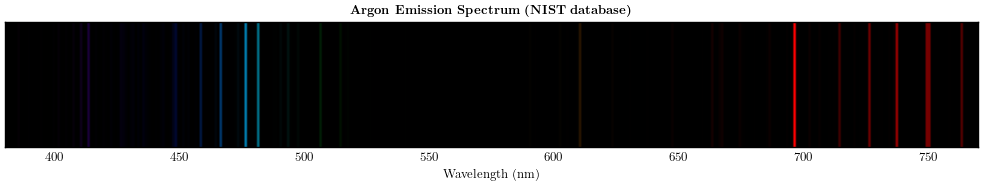

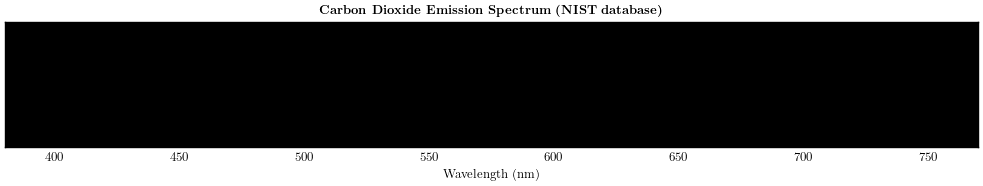

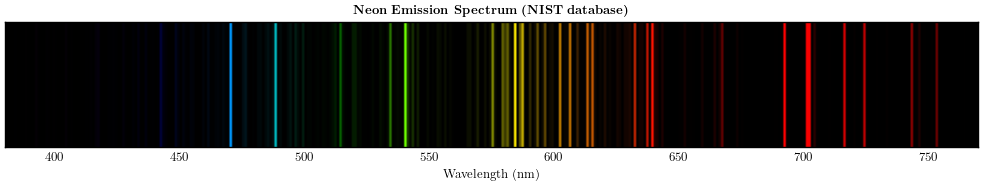

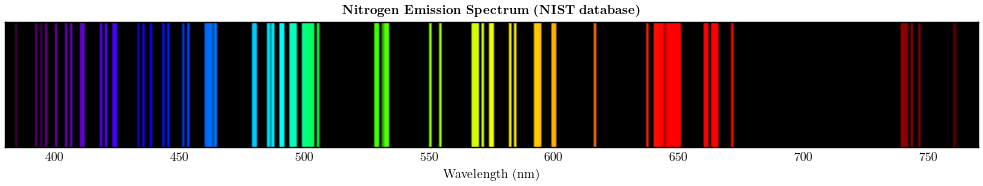

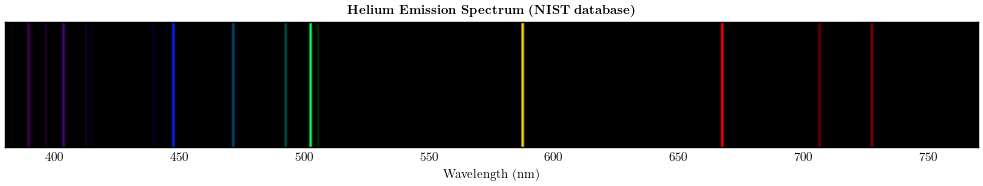

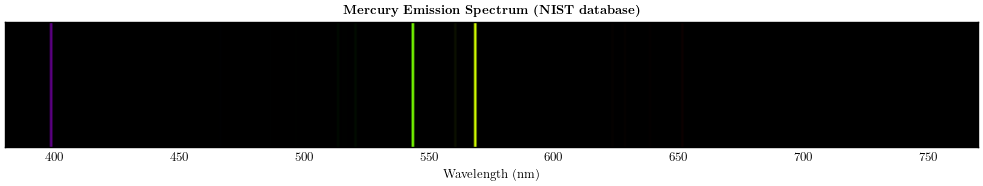

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def make_spectrum_intensity(title, wavelengths, intensities, height=50, set_title = True):
    width = 390
    min_wl, max_wl = 380, 770

    # Round wavelengths and map to positions
    wavelengths = np.round(wavelengths).astype(int)
    positions = np.round((wavelengths - min_wl) / (max_wl - min_wl) * (width - 1)).astype(int)

    # Create a blank spectrum image
    spectrum_img = np.zeros((height, width, 3))

    # Apply intensity-based RGB values
    for pos, wl, intensity in zip(positions, wavelengths, intensities):
        color = wavelength_to_rgb(wl, intensity)
        spectrum_img[:, pos, :] = color  # Apply brightness to the full column

    # Display the spectrum
    plt.figure(figsize=(10, 2))
    plt.imshow(spectrum_img, extent=[min_wl, max_wl, 0, height])
    plt.xlabel("Wavelength (nm)")
    plt.yticks([])
    plt.grid()
    if set_title:
        plt.title(rf"\textbf{{{title}}}")
    plt.tick_params(axis="x", which = 'both', length=0)
    plt.tight_layout()

H_int = process_nist_data(r"True data\H.csv")
Ar_int = process_nist_data(r"True data\Ar.csv")
He_int = process_nist_data(r"True data\He.csv")
Ne_int = process_nist_data(r"True data\Ne.csv")
N_int = process_nist_data(r"True data\N.csv")
Hg_int = process_nist_data(r"True data\Hg.csv")
CO2_int = pd.read_csv(r"True data\CO2.csv")

elements = ['Hydrogen', 'Argon', 'Carbon Dioxide', 'Neon', 'Nitrogen', 'Helium', 'Mercury']
spectras = [H_int, Ar_int,  CO2_int, Ne_int, N_int, He_int, Hg_int]
# Generate Spectrum with Intensity Representation
for element, spectra in zip(elements, spectras):
    make_spectrum_intensity(f"{element} Emission Spectrum (NIST database)", spectra['Wavelength'], np.clip(spectra['Intensity']*7.5,0,1))
    plt.savefig(fr'images\{element}_NIST', dpi = 300)
    plt.show()

[651. 480. 401.]


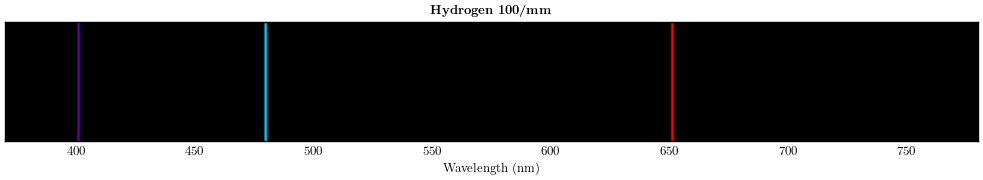

[657. 474. 399.]


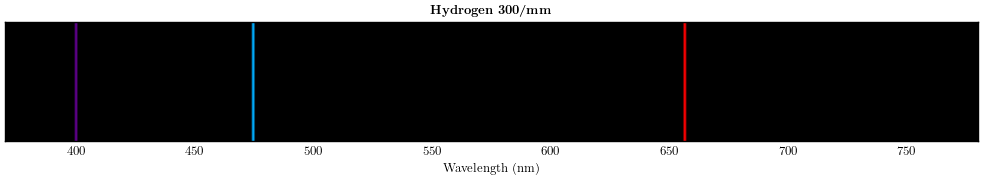

[596. 550. 506. 436. 416.]


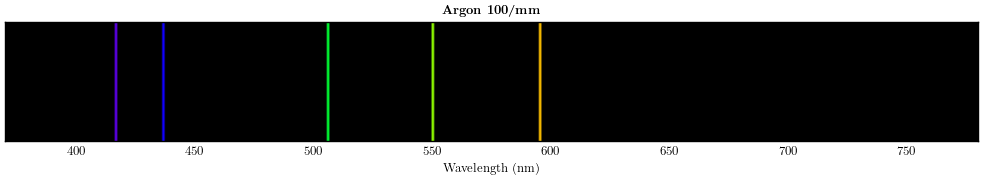

[588. 574. 546. 508. 446. 407.]


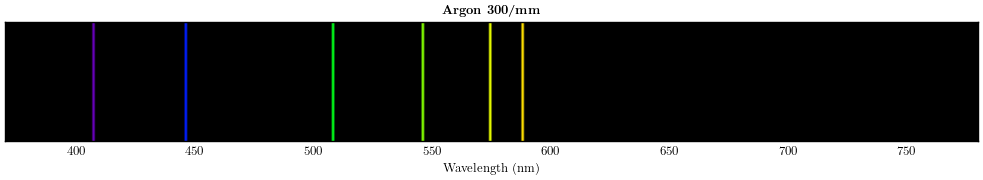

[628. 602. 541. 480. 425.]


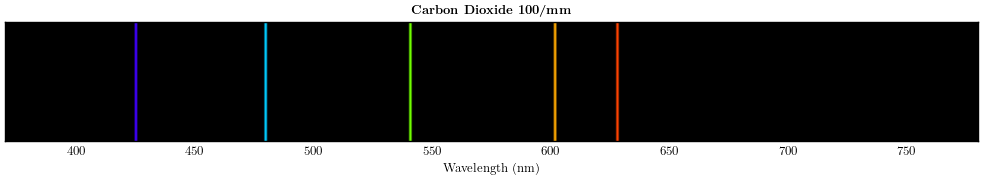

[588. 545. 508. 470. 442.]


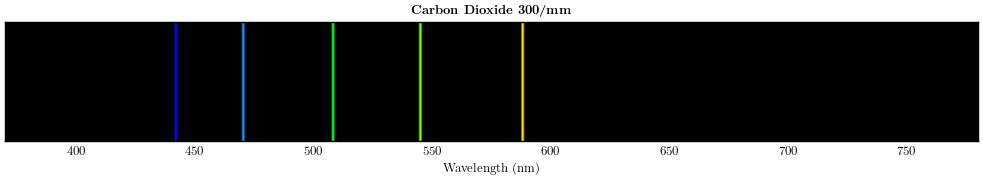

[640. 610. 584.]


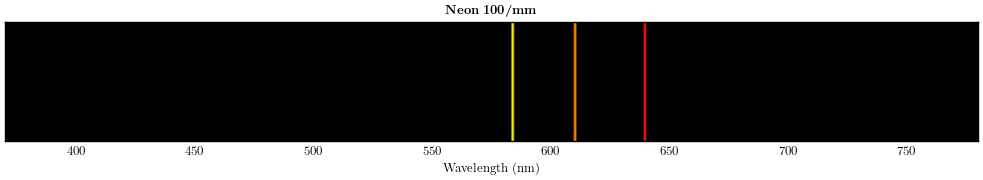

[642. 608. 584.]


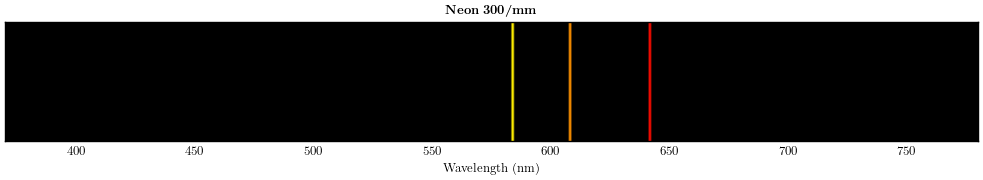

[625. 590. 642. 494. 425.]


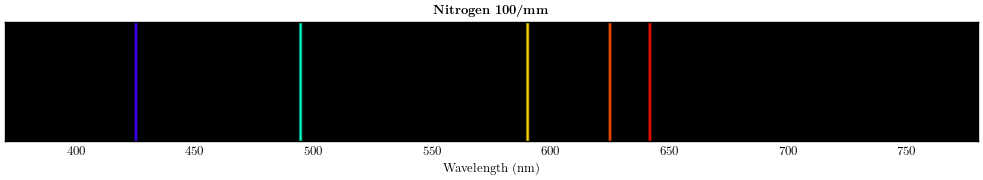

[646. 616. 583. 486. 431.]


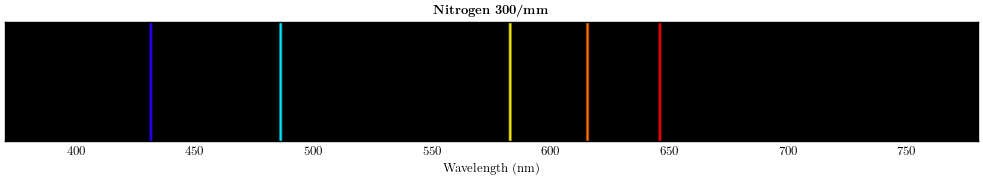

[657. 622. 581. 532. 483. 465. 427. 416.]


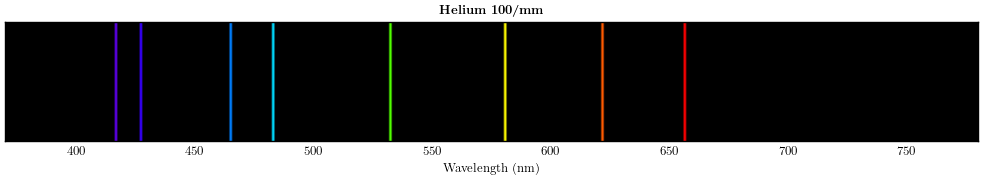

[663. 578. 491. 436.]


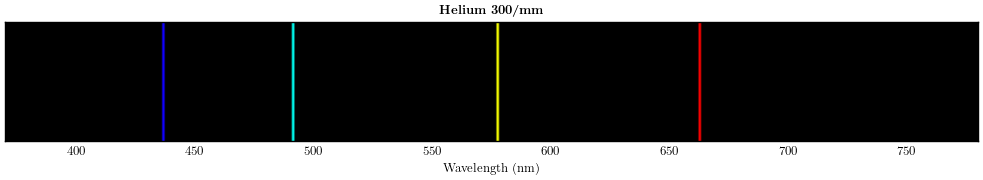

[573. 538. 425.]


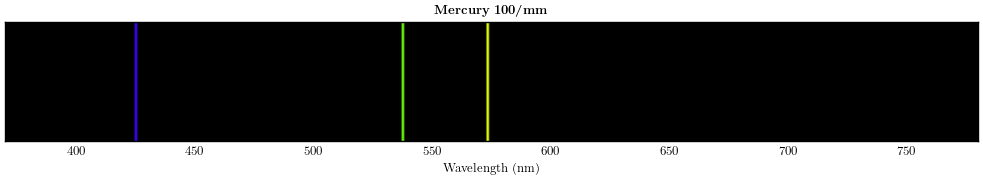

[571. 537. 429.]


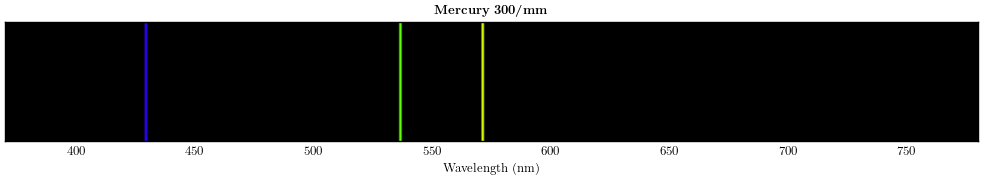

In [42]:
elements = ['Hydrogen', 'Argon', 'Carbon Dioxide', 'Neon', 'Nitrogen', 'Helium', 'Mercury']
gratings = [100,300]

for element in elements:
    for grating in gratings:
        make_spectrum(f"{element} {grating}/mm", element_spectra(element, grating), height = 50)
        plt.savefig(fr'images\{element}-{grating}permm', dpi = 300)
        plt.show()


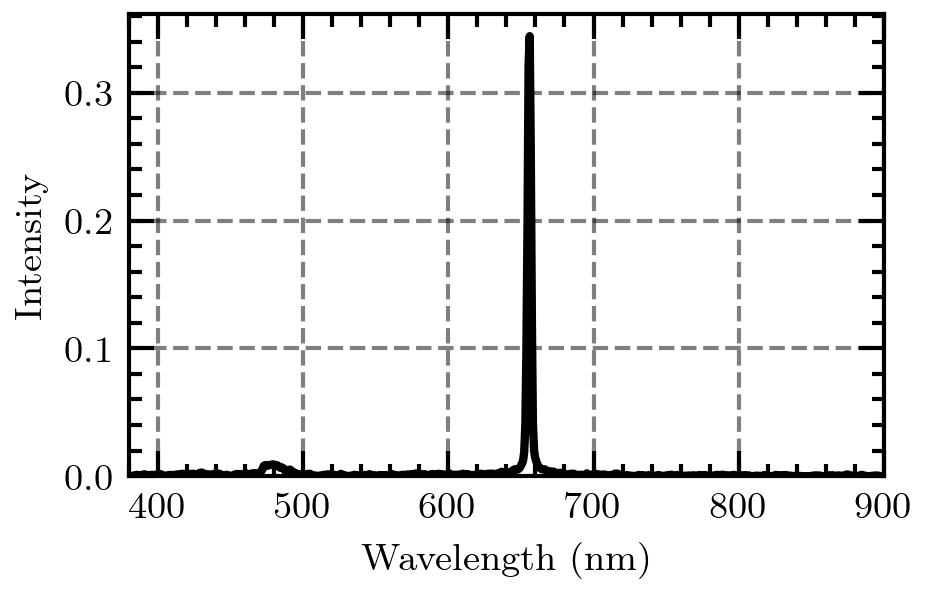

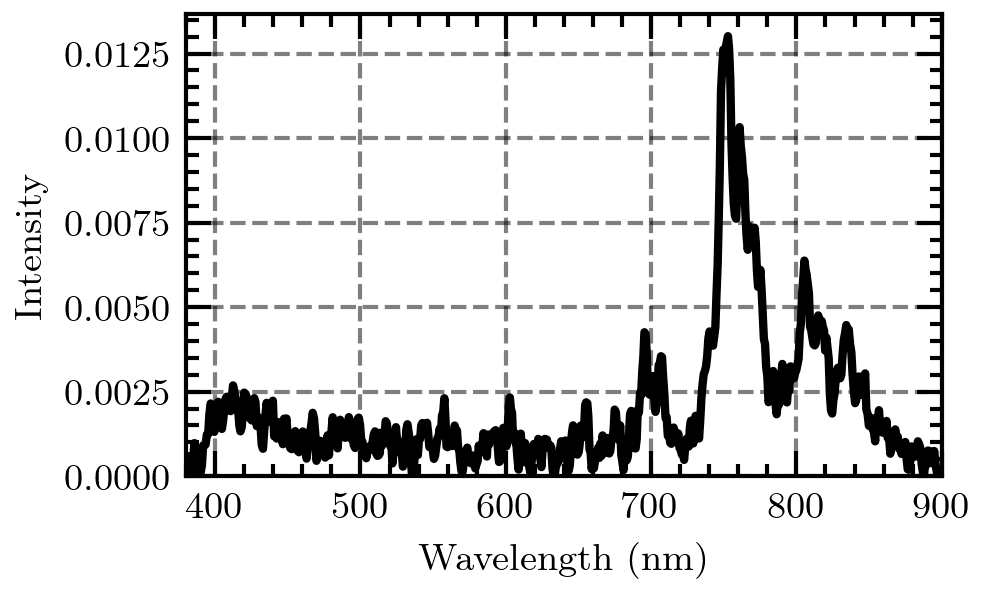

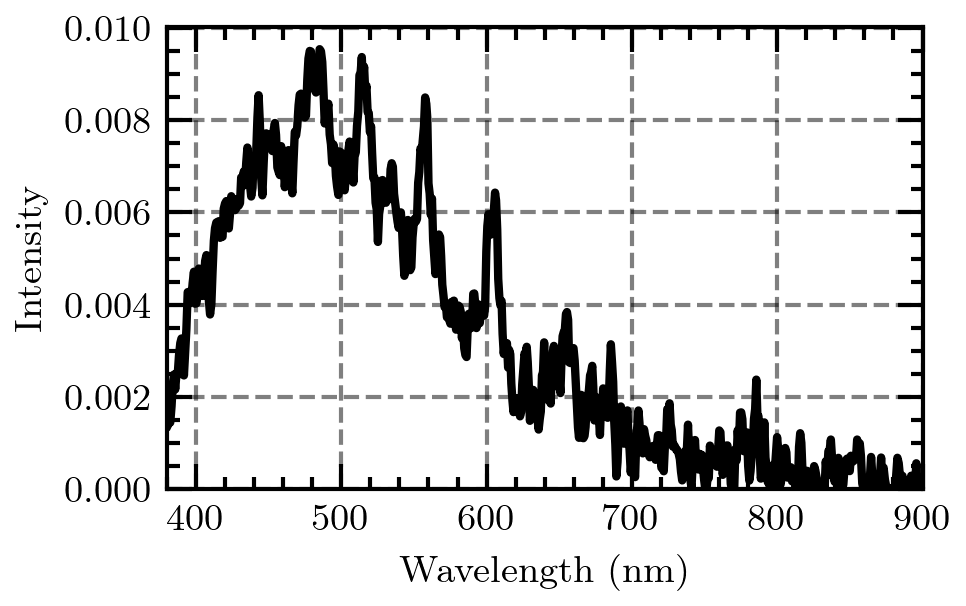

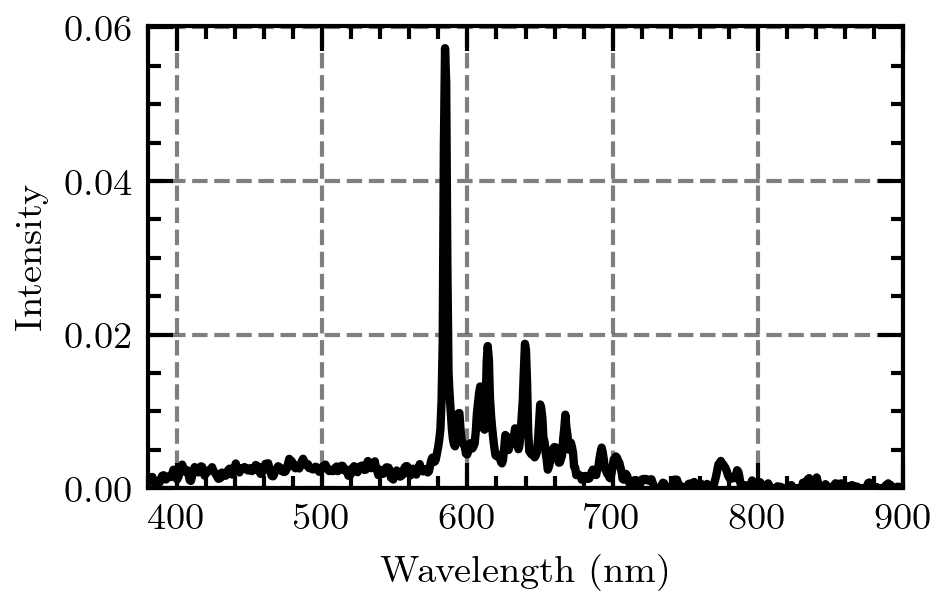

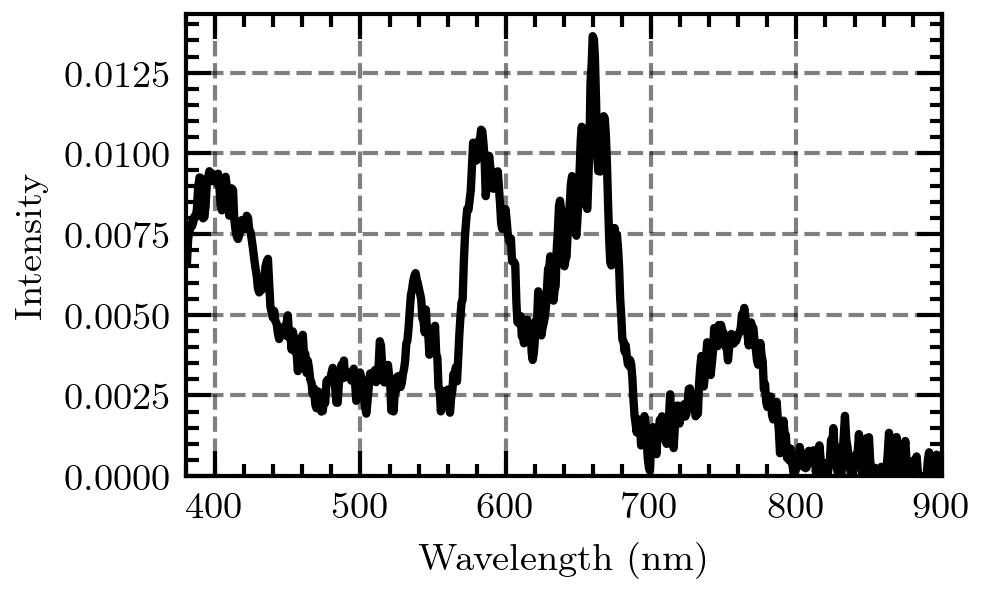

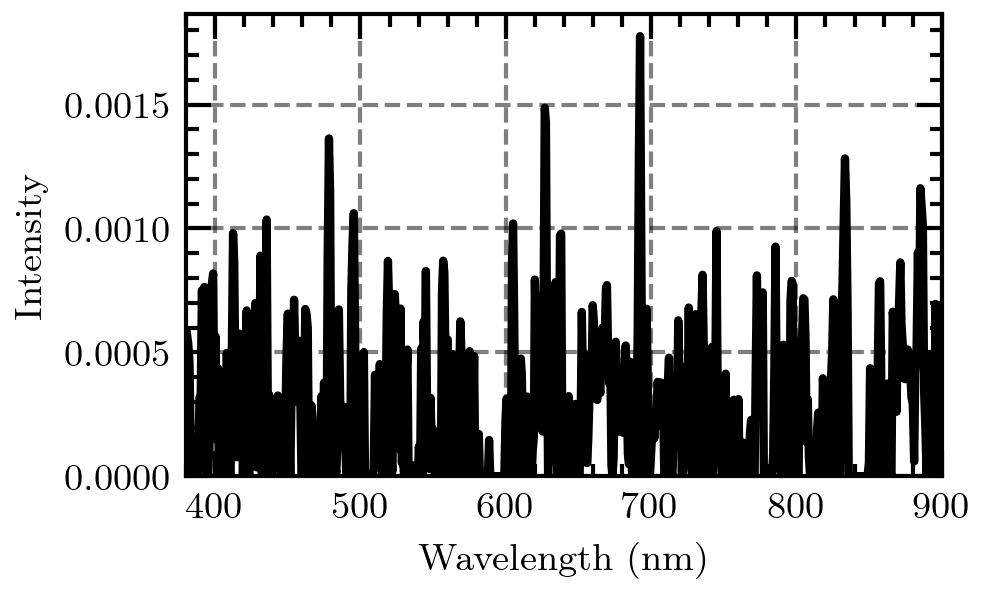

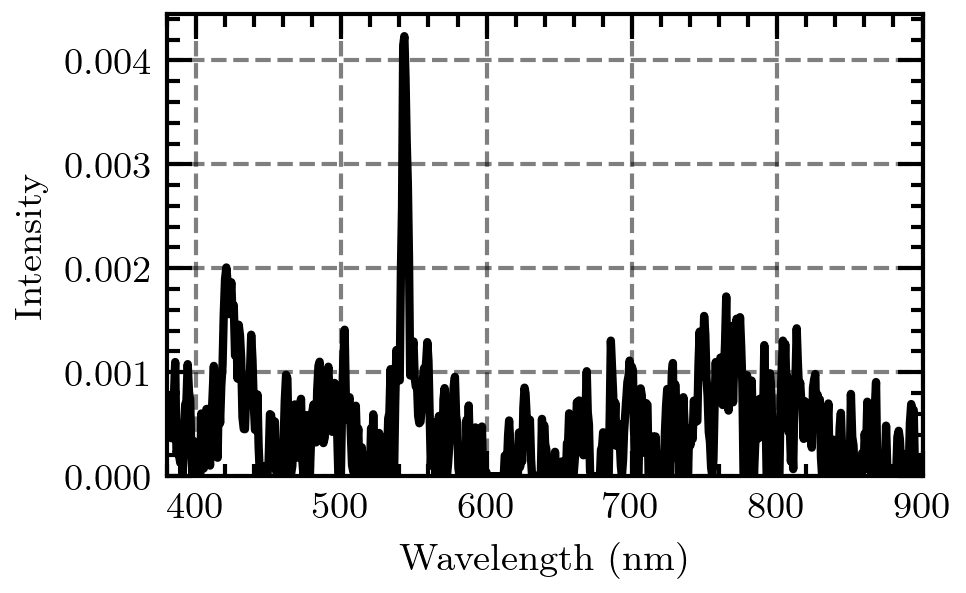

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
H_df = pd.read_csv('Actual data/HYDROGEN.csv')
Ar_df = pd.read_csv('Actual data/ARGON.csv')
CO2_df = pd.read_csv('Actual data/CO2.csv')
He_df = pd.read_csv('Actual data/HELIUM.csv')
Ne_df = pd.read_csv('Actual data/NEON.csv')
N_df = pd.read_csv('Actual data/NITROGEN.csv')
Hg_df = pd.read_csv('Actual data/MERCURY.csv')
ambient_df = pd.read_csv('Actual data/AMBIENT.csv')

# Compute average ambient intensity
ambient_avg = ambient_df['Data Set 1:Intensity'].mean()

# Function to subtract ambient intensity
def subtract_ambient(df):
    df = df.copy()
    df['Data Set 1:Intensity'] -= ambient_avg
    df['Data Set 1:Intensity'] = df['Data Set 1:Intensity'].clip(lower=0)  # Corrected argument
    return df

# Subtract ambient from each dataset
H_df = subtract_ambient(H_df)
Ar_df = subtract_ambient(Ar_df)
CO2_df = subtract_ambient(CO2_df)
He_df = subtract_ambient(He_df)
Ne_df = subtract_ambient(Ne_df)
N_df = subtract_ambient(N_df)
Hg_df = subtract_ambient(Hg_df)

elements = ['Hydrogen', 'Argon', 'Carbon Dioxide', 'Neon', 'Nitrogen', 'Helium', 'Mercury']
spectras = [H_df, Ar_df, CO2_df, Ne_df, N_df, He_df, Hg_df]
# Function to plot spectra
def plot_spectra(df, label):
    plt.figure(figsize=(3.25, 2), dpi = 300)
    x = df['Data Set 1:Wavelength(nm)']
    y = df['Data Set 1:Intensity']
    plt.xlim(380,900)
    plt.plot(x, y, label=label, color = 'k')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.ylim(0, None)
    #plt.legend()
    plt.savefig(fr'plots\{element}-vernierspectrum', dpi = 300)
    plt.show()
    
for element, spectra in zip(elements,spectras):
    plot_spectra(spectra, element)


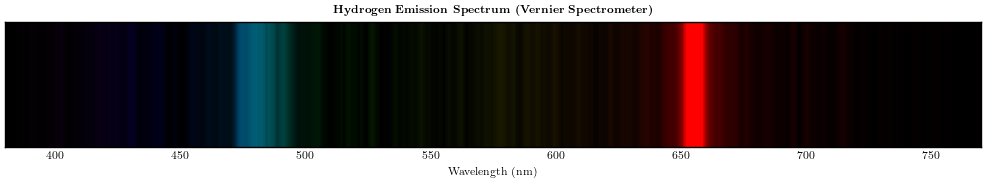

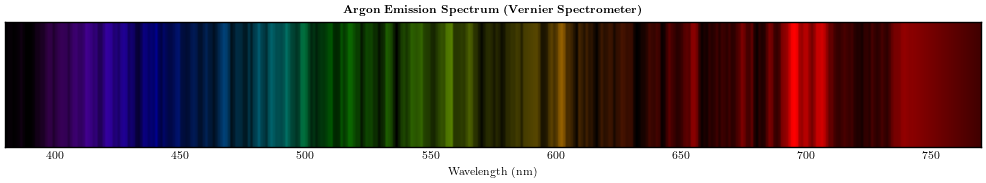

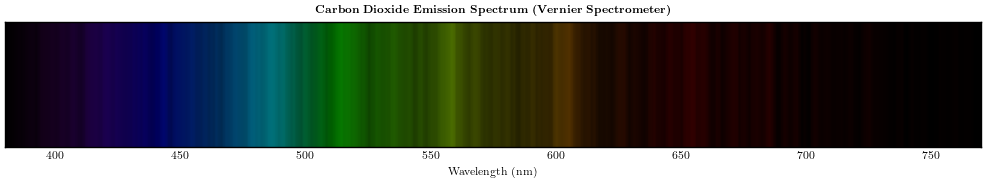

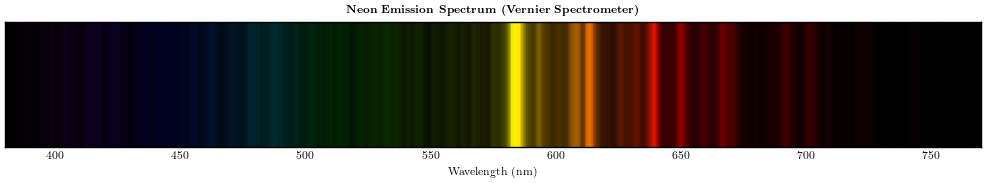

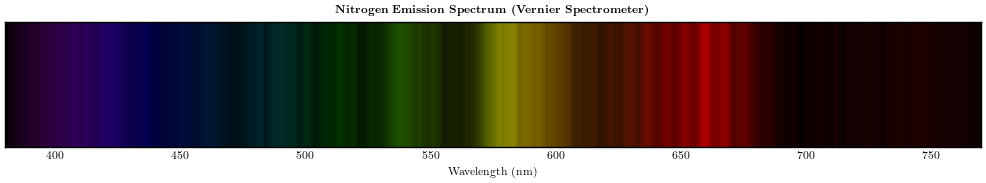

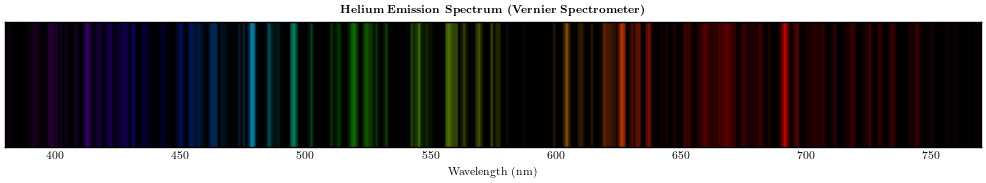

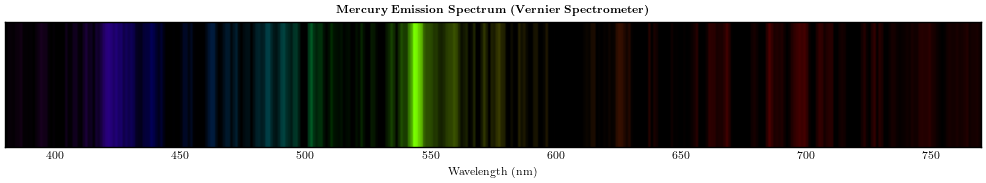

In [ ]:
def process_wavelength_intensity(df):
    # Rename columns
    df = df.rename(columns={'Data Set 1:Wavelength(nm)': 'Wavelength', 'Data Set 1:Intensity': 'Intensity'})
    
    # Round wavelengths to the nearest integer
    df['Wavelength'] = df['Wavelength'].round().astype(int)
    
    # Filter wavelengths between 380 and 770 nm
    df = df[(df['Wavelength'] >= 380) & (df['Wavelength'] <= 770)]
    
    # Group by rounded wavelength and compute the mean intensity
    df_avg = df.groupby('Wavelength', as_index=False)['Intensity'].mean()
    
    # Normalize intensities so that the maximum intensity becomes 1.0
    df_avg['Intensity'] /= 0.02
    
    return df_avg

# Example usage with H_df
H_processed = process_wavelength_intensity(H_df)
He_processed = process_wavelength_intensity(He_df)
Ar_processed = process_wavelength_intensity(Ar_df)
Ne_processed = process_wavelength_intensity(Ne_df)
Hg_processed = process_wavelength_intensity(Hg_df)
CO2_processed = process_wavelength_intensity(CO2_df)
N_processed = process_wavelength_intensity(N_df)

He_processed["Intensity"] = He_processed["Intensity"] *10
Ar_processed["Intensity"] = Ar_processed["Intensity"] *5
Hg_processed["Intensity"] = Hg_processed["Intensity"] *5

elements = ['Hydrogen', 'Argon', 'Carbon Dioxide', 'Neon', 'Nitrogen', 'Helium', 'Mercury']
processeds = [H_processed, Ar_processed, CO2_processed, Ne_processed, N_processed, He_processed, Hg_processed]
for element, processed in zip(elements, processeds):
    make_spectrum_intensity(f"{element} Emission Spectrum (Vernier Spectrometer)", processed['Wavelength'], np.clip(processed['Intensity'],0,1))
    plt.savefig(fr'images\{element}-vernierspectrum-spectrum', dpi = 300)
    plt.show()

[651. 480. 401.]
[657. 474. 399.]


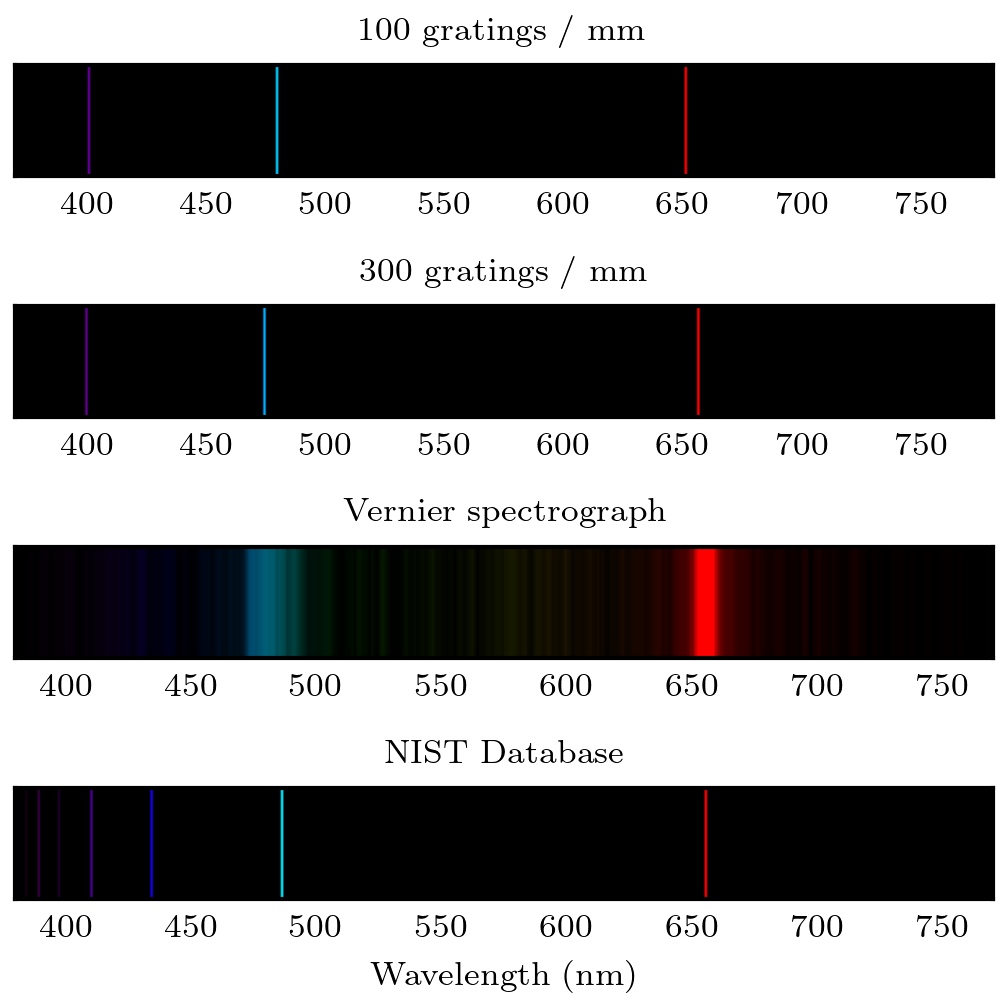

[596. 550. 506. 436. 416.]
[588. 574. 546. 508. 446. 407.]


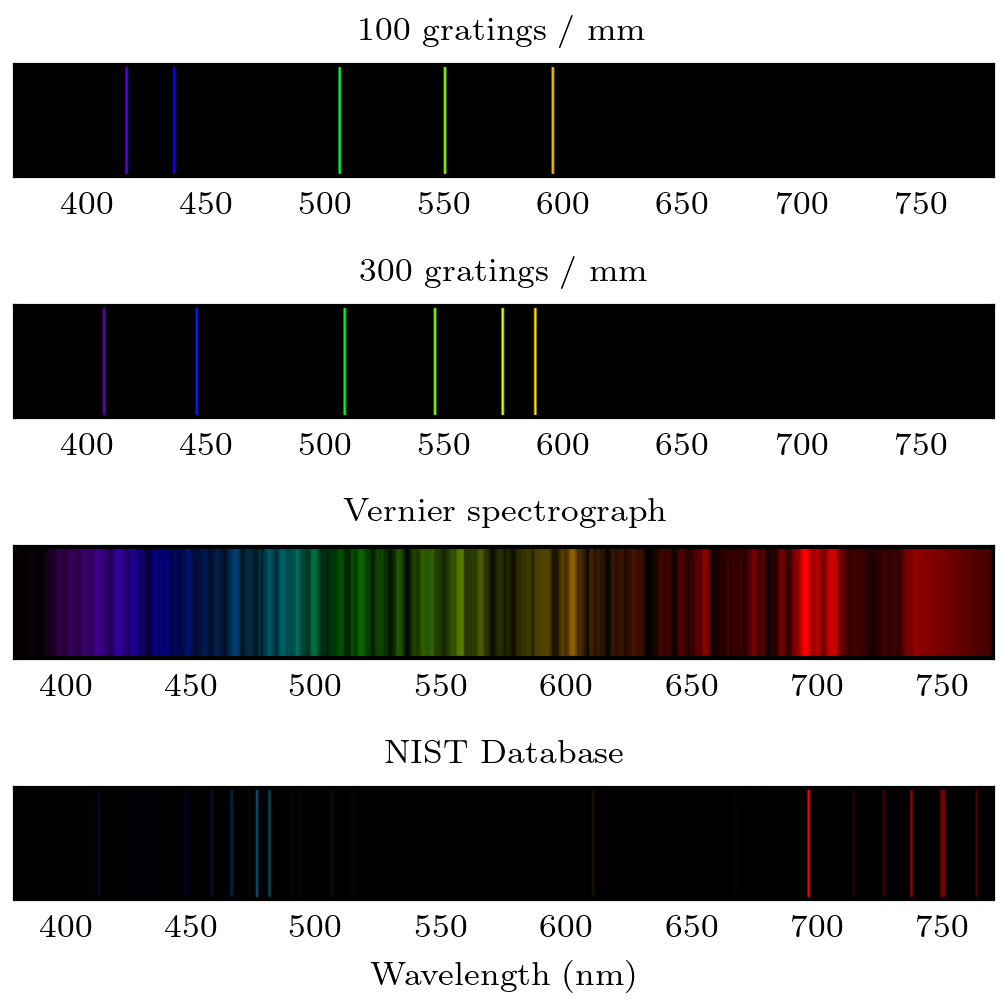

[628. 602. 541. 480. 425.]
[588. 545. 508. 470. 442.]


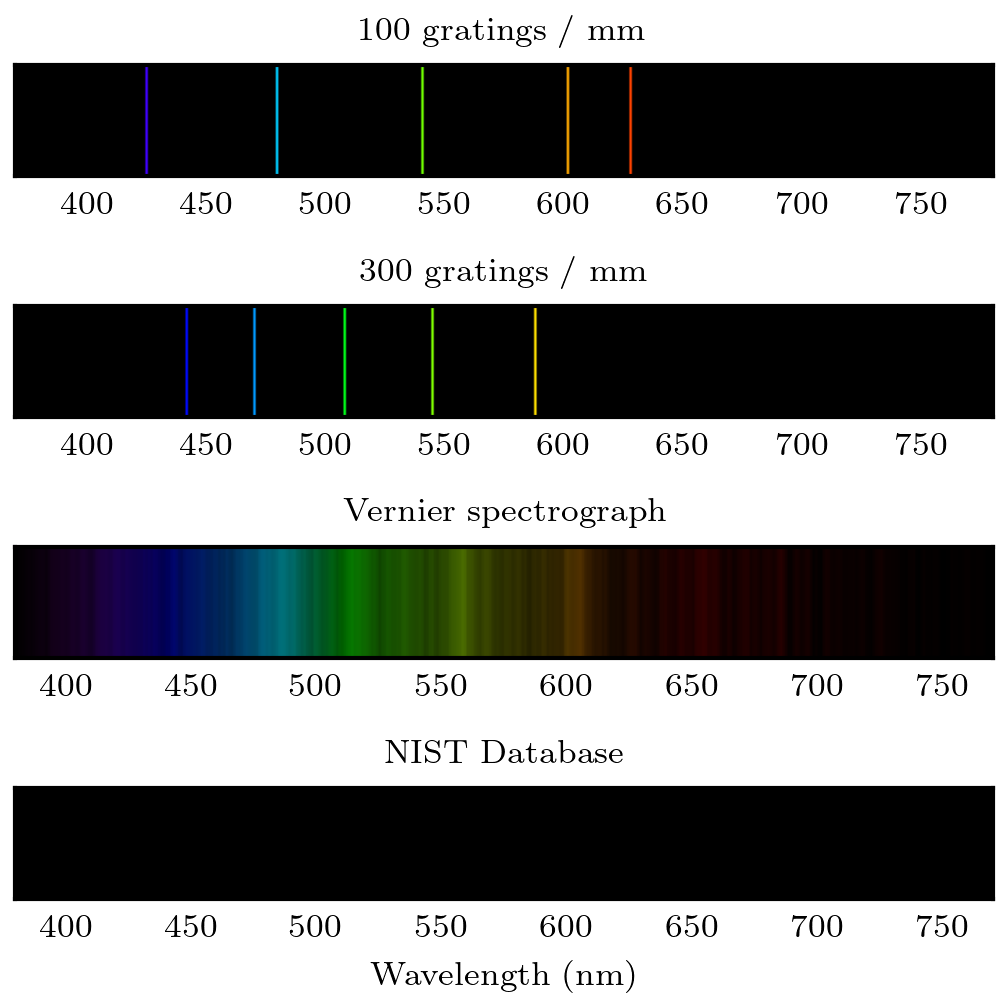

[640. 610. 584.]
[642. 608. 584.]


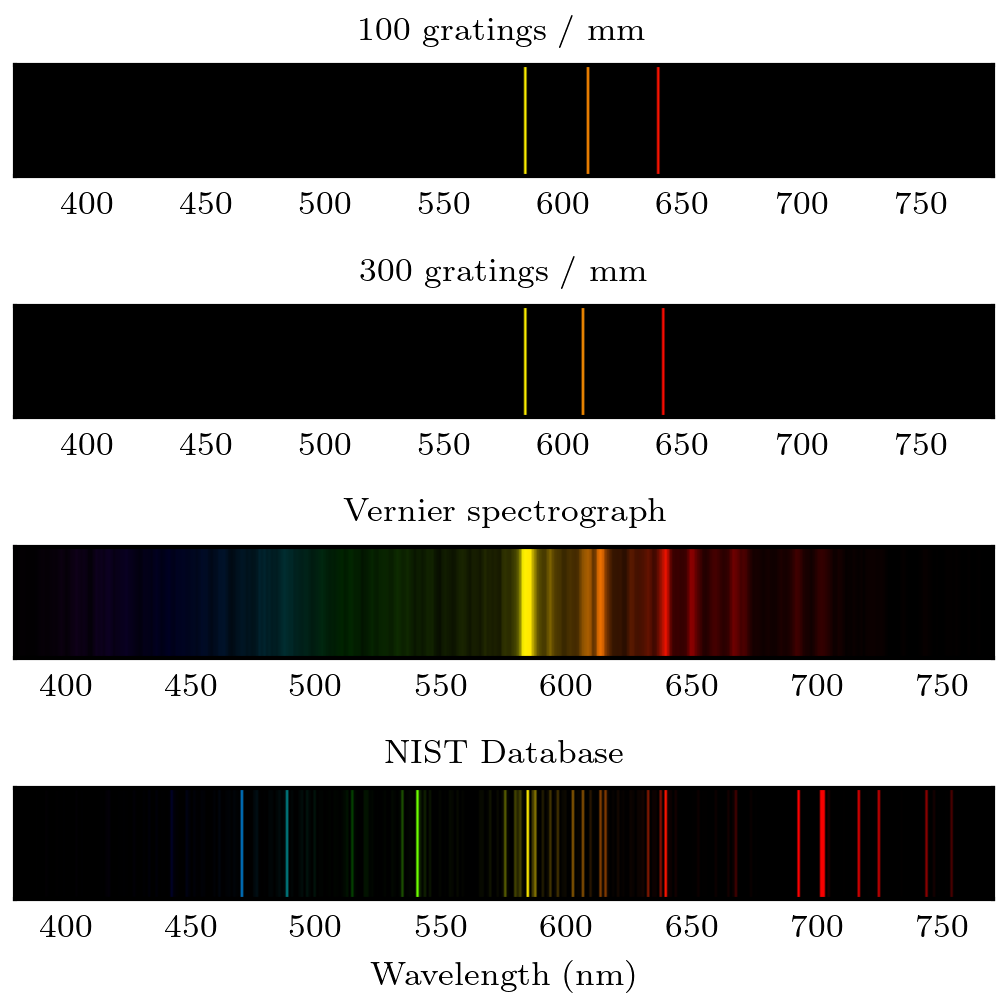

[625. 590. 642. 494. 425.]
[646. 616. 583. 486. 431.]


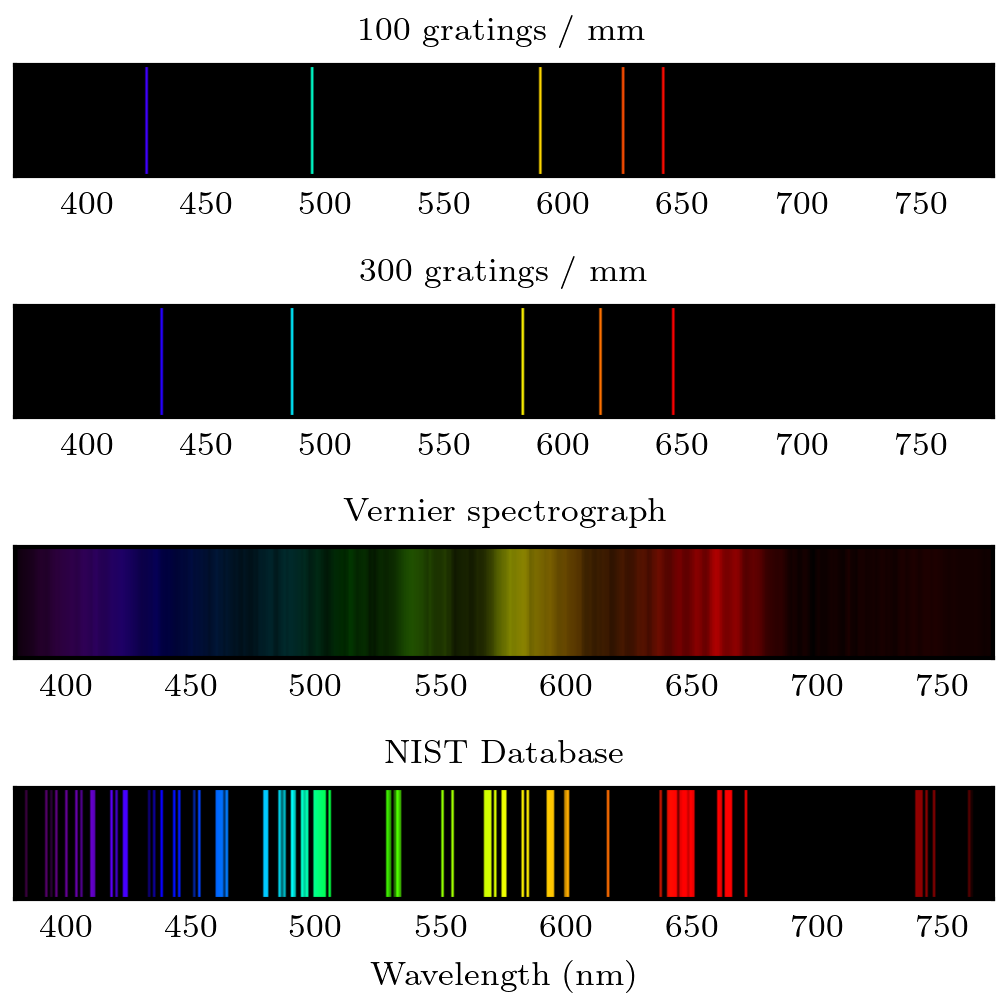

[657. 622. 581. 532. 483. 465. 427. 416.]
[663. 578. 491. 436.]


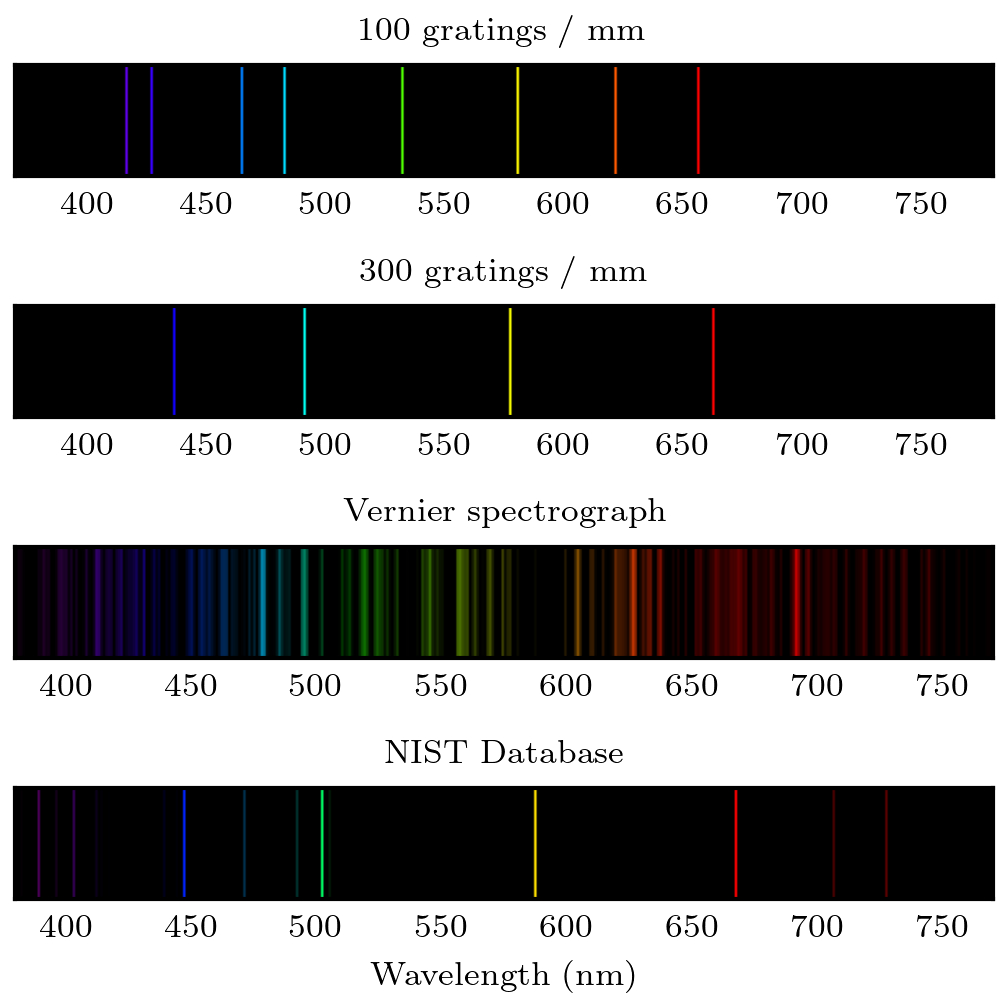

[573. 538. 425.]
[571. 537. 429.]


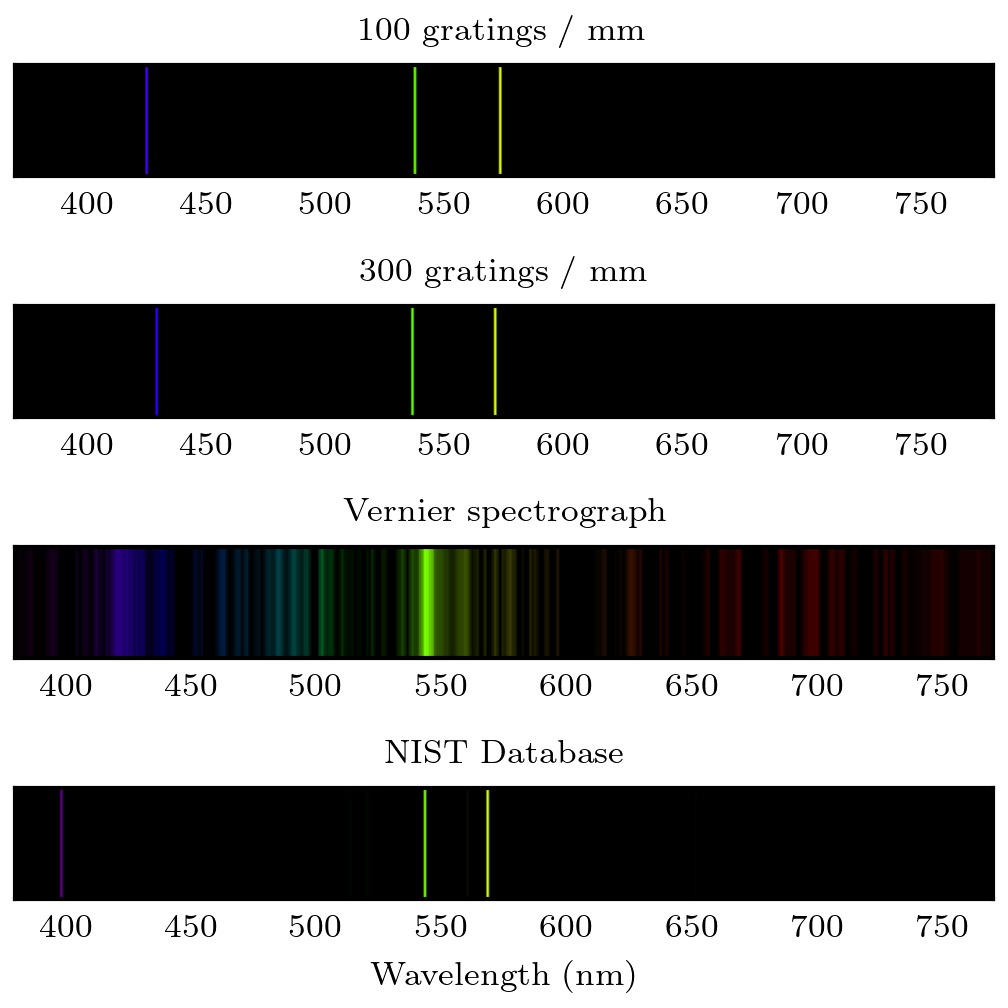

In [ ]:
def ax_make_spectrum(ax, title, wavelengths, height=100, set_title=True, xlabel = True):
    width = 390
    min_wl, max_wl = 370, 780
    positions = np.round((wavelengths - min_wl) / (max_wl - min_wl) * (width - 1)).astype(int)

    spectrum_img = np.zeros((height, width, 3))

    for pos, wl in zip(positions, wavelengths):
        color = wavelength_to_rgb(wl)
        spectrum_img[:, pos, :] = color  

    ax.imshow(spectrum_img, extent=[min_wl, max_wl, 0, height], aspect="auto")
    ax.set_yticks([])
    ax.tick_params(axis="x", which="both", length=0)
    ax.grid()
    
    if xlabel:
        ax.set_xlabel("Wavelength (nm)")
    if set_title and title:
        ax.set_title(title)

def ax_make_spectrum_intensity(ax, title, wavelengths, intensities, height=50, set_title=True, xlabel = False):
    width = 390
    min_wl, max_wl = 380, 770

    wavelengths = np.round(wavelengths).astype(int)
    positions = np.round((wavelengths - min_wl) / (max_wl - min_wl) * (width - 1)).astype(int)

    spectrum_img = np.zeros((height, width, 3))

    for pos, wl, intensity in zip(positions, wavelengths, intensities):
        color = wavelength_to_rgb(wl, intensity)
        spectrum_img[:, pos, :] = color  

    ax.imshow(spectrum_img, extent=[min_wl, max_wl, 0, height], aspect="auto")
    ax.set_yticks([])
    ax.tick_params(axis="x", which="both", length=0)
    ax.grid()
    if xlabel:
        ax.set_xlabel("Wavelength (nm)")
    if set_title and title:
        ax.set_title(title)

elements = ['Hydrogen', 'Argon', 'Carbon Dioxide', 'Neon', 'Nitrogen', 'Helium', 'Mercury']
spectras = [H_int, Ar_int,  CO2_int, Ne_int, N_int, He_int, Hg_int]
processeds = [H_processed, Ar_processed, CO2_processed, Ne_processed, N_processed, He_processed, Hg_processed]

for element, spectra, processed in zip(elements,spectras,processeds):
    fig, axes = plt.subplots(4, 1, figsize=(3.5, 3.5), dpi = 300)
    ax_make_spectrum(
        axes[0], 
        "100 gratings / mm", 
        element_spectra(element, 100), 
        height=50, 
        set_title=True,
        xlabel=False
    )
    ax_make_spectrum(
        axes[1], 
        "300 gratings / mm", 
        element_spectra(element, 300), 
        height=50, 
        set_title=True,
        xlabel=False
    )
    ax_make_spectrum_intensity(
        axes[2], 
        'Vernier spectrograph', 
        processed['Wavelength'], 
        np.clip(processed['Intensity'], 0, 1), 
        height=50,
        set_title=True,
        xlabel=False
    )
    ax_make_spectrum_intensity(
        axes[3], 
        'NIST Database', 
        spectra['Wavelength'], 
        np.clip(spectra['Intensity']*5, 0, 1),
        height=50,
        set_title=True,
        xlabel=True
    )

    # plt.suptitle(rf"\textbf{{{element} Emission Spectrum}}")
    plt.tight_layout()
    plt.savefig(rf'act_figs\{element}-spectra-comparison.png', dpi = 300)
    plt.show()


In [ ]:
print(physical_data)

def lambda2frequency(wavelength_nm):
    c = 299_792_458  # Speed of light in m/s
    wavelength_m = wavelength_nm * 1e-9  # Convert nm to m
    return c / wavelength_m  # Frequency in Hz

def frequency_to_energy(frequency_hz):
    h_J_s = 6.62607015e-34  # Planck's constant in J·s
    eV_conversion = 1.602176634e-19  # 1 eV in Joules
    energy_eV = (h_J_s * frequency_hz) / eV_conversion  # Convert J to eV
    return energy_eV

physical_data['frequency'] = physical_data['wavelength'].apply(lambda2frequency)
physical_data['energy'] = physical_data['frequency'].apply(frequency_to_energy)

print(physical_data[['Element', 'wavelength', 'energy']])

           Element  Grating/mm  0Degree  0minute  Degree  Minute  true_angle  \
0         Hydrogen         100       -1       -5       4      49        3.73   
1         Hydrogen         100       -1       -5       3      50        2.75   
2         Hydrogen         100       -1       -5       3      23        2.30   
3            Argon         100       -1       -5       4      30        3.42   
4            Argon         100       -1       -5       4      14        3.15   
5            Argon         100       -1       -5       3      59        2.90   
6            Argon         100       -1       -5       3      35        2.50   
7            Argon         100       -1       -5       3      28        2.38   
8   Carbon Dioxide         100       -1       -5       4      41        3.60   
9   Carbon Dioxide         100       -1       -5       4      32        3.45   
10  Carbon Dioxide         100       -1       -5       4      11        3.10   
11  Carbon Dioxide         100       -1 

In [ ]:
# Print without truncation
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 0)  # No width limitation
pd.set_option('display.float_format', '{:.2f}'.format)  # Format float values

print(physical_data[['Element', 'wavelength', 'energy']])

           Element  wavelength  energy
0         Hydrogen      651.13    1.90
1         Hydrogen      479.78    2.58
2         Hydrogen      401.32    3.09
3            Argon      595.97    2.08
4            Argon      549.50    2.26
5            Argon      505.93    2.45
6            Argon      436.19    2.84
7            Argon      415.85    2.98
8   Carbon Dioxide      627.91    1.97
9   Carbon Dioxide      601.77    2.06
10  Carbon Dioxide      540.79    2.29
11  Carbon Dioxide      479.78    2.58
12  Carbon Dioxide      424.57    2.92
13            Neon      639.52    1.94
14            Neon      610.49    2.03
15            Neon      584.35    2.12
16        Nitrogen      625.00    1.98
17        Nitrogen      590.16    2.10
18        Nitrogen      642.42    1.93
19        Nitrogen      494.31    2.51
20        Nitrogen      424.57    2.92
21          Helium      656.93    1.89
22          Helium      622.10    1.99
23          Helium      581.45    2.13
24          Helium      5

In [54]:

Hg_int["Frequency"] = Hg_int['Wavelength'].apply(lambda2frequency)
Hg_int['energy'] =  Hg_int['Frequency'].apply(frequency_to_energy)

print(Hg_int)

     Wavelength  Intensity          Frequency  energy
0        380.17       0.00 788583387412803.38    3.26
1        380.35       0.00 788199473644081.38    3.26
2        380.63       0.00 787619244034645.62    3.26
3        381.58       0.00 785660826039100.62    3.25
4        382.04       0.00 784714841377866.12    3.25
5        382.89       0.00 782970966403223.50    3.24
6        383.93       0.00 780860207659863.50    3.23
7        386.08       0.00 776493409482367.88    3.21
8        388.32       0.00 772027633001071.50    3.19
9        389.39       0.00 769910726117528.50    3.18
10       390.19       0.00 768330599599986.50    3.18
11       390.36       0.00 767982220687471.50    3.18
12       390.64       0.00 767444920106154.75    3.17
13       390.93       0.00 766865997155515.50    3.17
14       391.34       0.00 766072944346901.12    3.17
15       391.43       0.00 765887802022985.75    3.17
16       391.93       0.00 764920296259705.88    3.16
17       394.04       0.00 7